<a href="https://colab.research.google.com/github/robinz1234/Plant_Disease_Detection_using_Xception_-_Densenet121_model/blob/main/Plant_Disease_Detection_using_Xception_%26_Densenet121_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Downloading Necessary libraries
!pip install tensor-dash

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls

drive  sample_data


In [6]:
import pandas as pd

In [7]:
# Reading the Training Data
dataset = pd.read_csv('/content/drive/MyDrive/plant/train.csv')

In [8]:
# Importing Necessary Libraries
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensordash.tensordash import Tensordash
import plotly.express as px
import json
import skimage.io as io
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

In [9]:
dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

# Data Exploration and Visualisation

## Data Exploration

In [10]:
# Checking if there are any null values in the dataset
dataset.isnull().any()

image_id             False
healthy              False
multiple_diseases    False
rust                 False
scab                 False
dtype: bool

In [11]:
# Checking the column data type
dataset.dtypes

image_id             object
healthy               int64
multiple_diseases     int64
rust                  int64
scab                  int64
dtype: object

In [12]:
# Adding .jpg extension to every image_id
dataset['image_id'] = dataset['image_id']+'.jpg'

In [13]:
dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0.jpg        0                  0     0     1
1        Train_1.jpg        0                  1     0     0
2        Train_2.jpg        1                  0     0     0
3        Train_3.jpg        0                  0     1     0
4        Train_4.jpg        1                  0     0     0
...              ...      ...                ...   ...   ...
1816  Train_1816.jpg        0                  0     0     1
1817  Train_1817.jpg        1                  0     0     0
1818  Train_1818.jpg        1                  0     0     0
1819  Train_1819.jpg        0                  0     1     0
1820  Train_1820.jpg        0                  0     0     1

[1821 rows x 5 columns]

## Data Visualisation

## Classes Distribution

Text(0.5, 1.0, 'Healthy Classes')

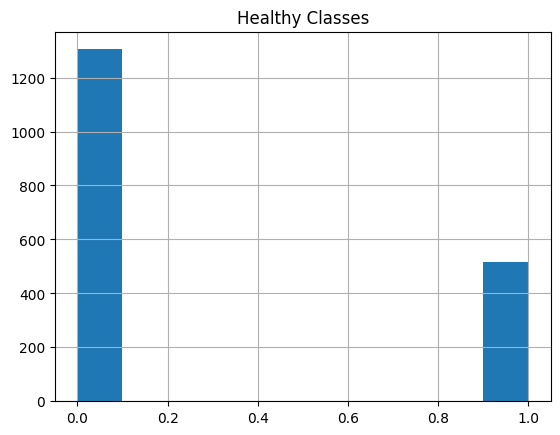

In [14]:
dataset.healthy.hist()
plt.title('Healthy Classes')


Text(0.5, 1.0, 'Multiple Diseases Classes')

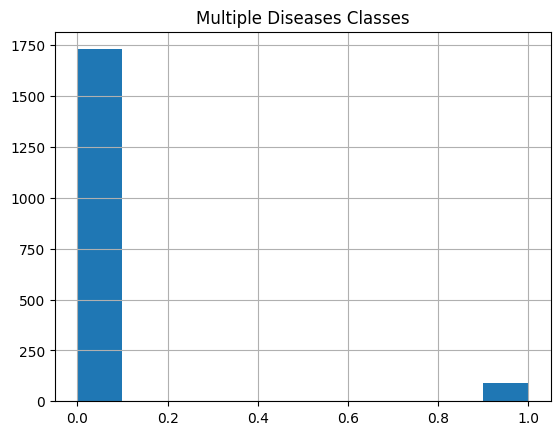

In [15]:
dataset.multiple_diseases.hist()
plt.title('Multiple Diseases Classes')

Text(0.5, 1.0, 'Rust Classes')

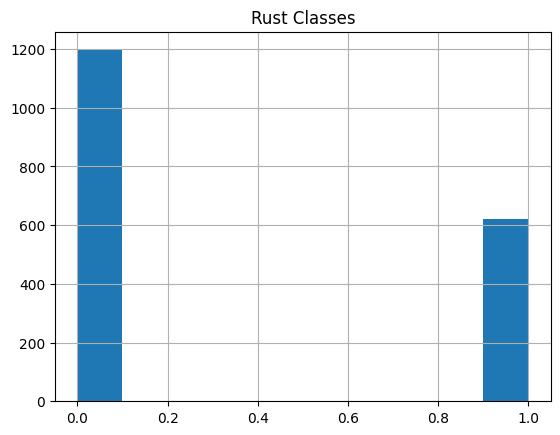

In [16]:
dataset.rust.hist()
plt.title('Rust Classes')

Text(0.5, 1.0, 'Scab Classes')

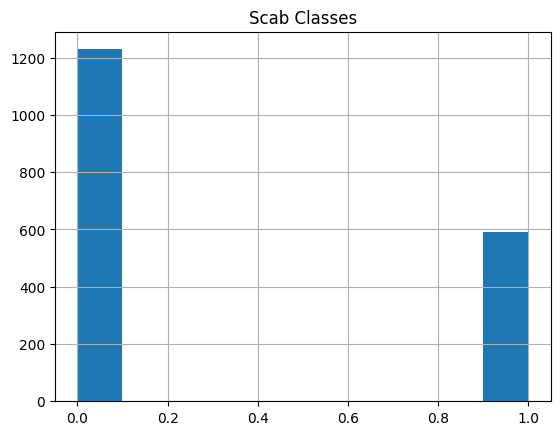

In [17]:
dataset.scab.hist()
plt.title('Scab Classes')

## Class Image Visualisation

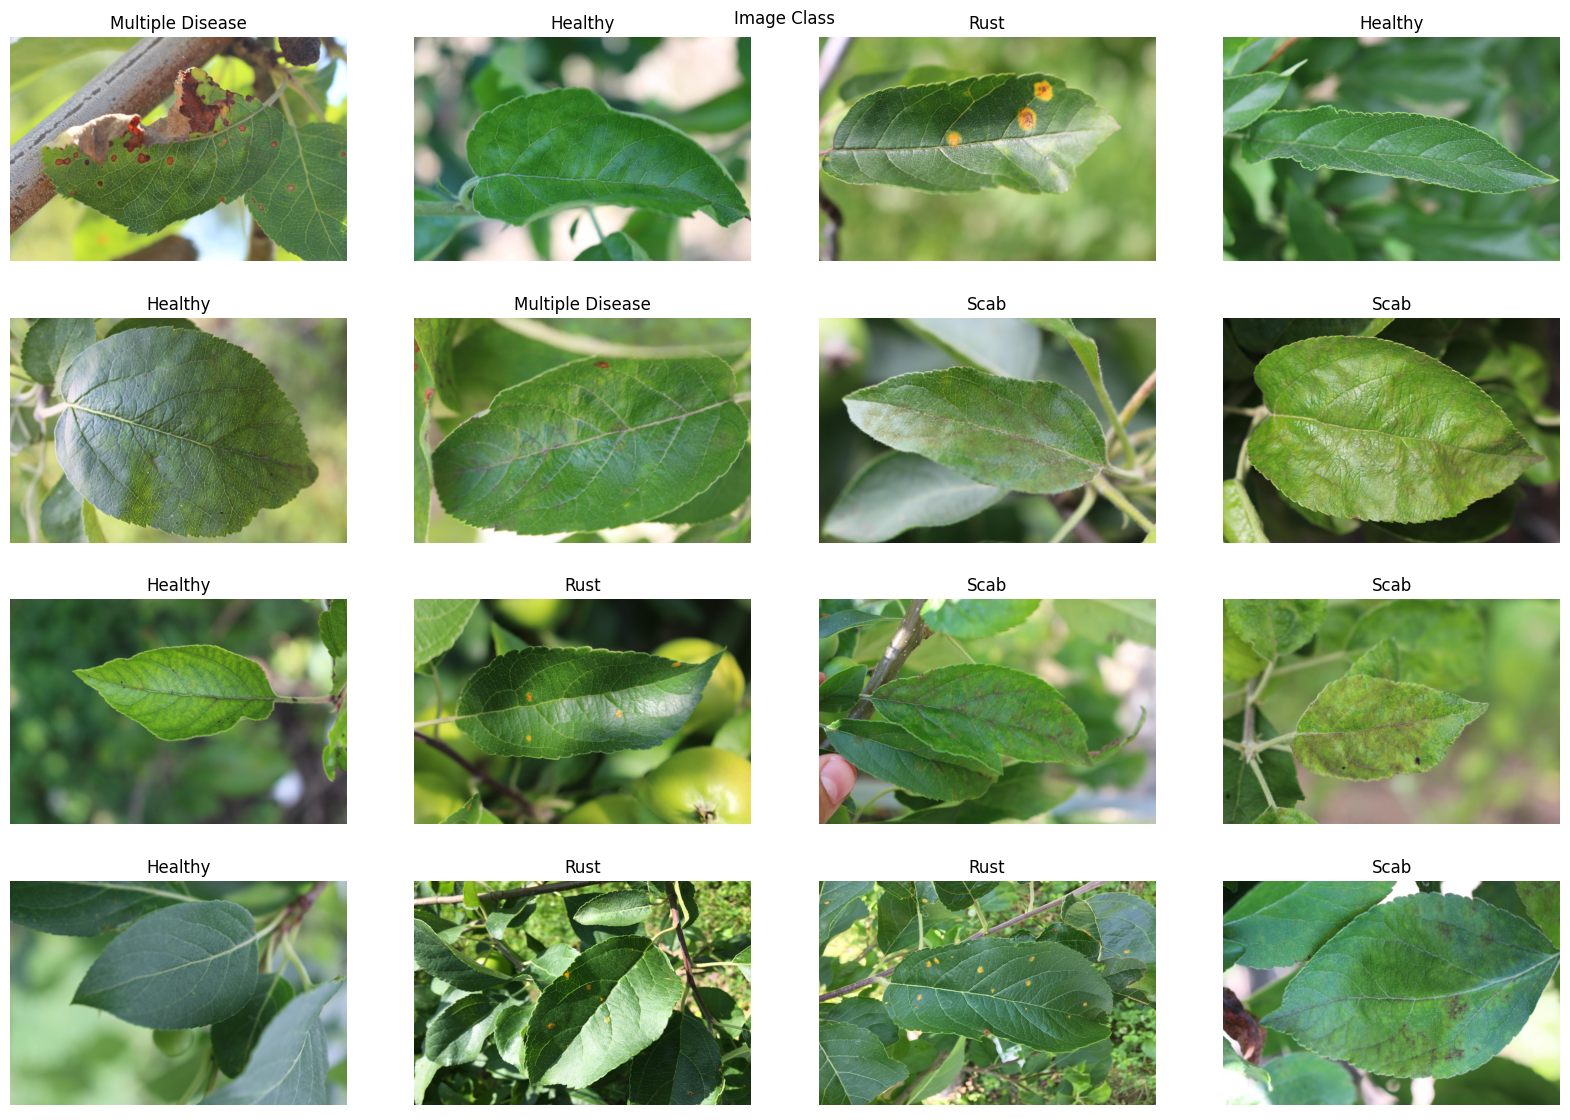

In [18]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'/content/drive/MyDrive/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)

    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.multiple_diseases[i] == 1:
        plt.title('Multiple Disease')
    elif dataset.rust[i] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')
    plt.imshow(img)
    plt.axis('off')
plt.show()

# Image Segmentation

Multiple Histogram for different pixles intensity values

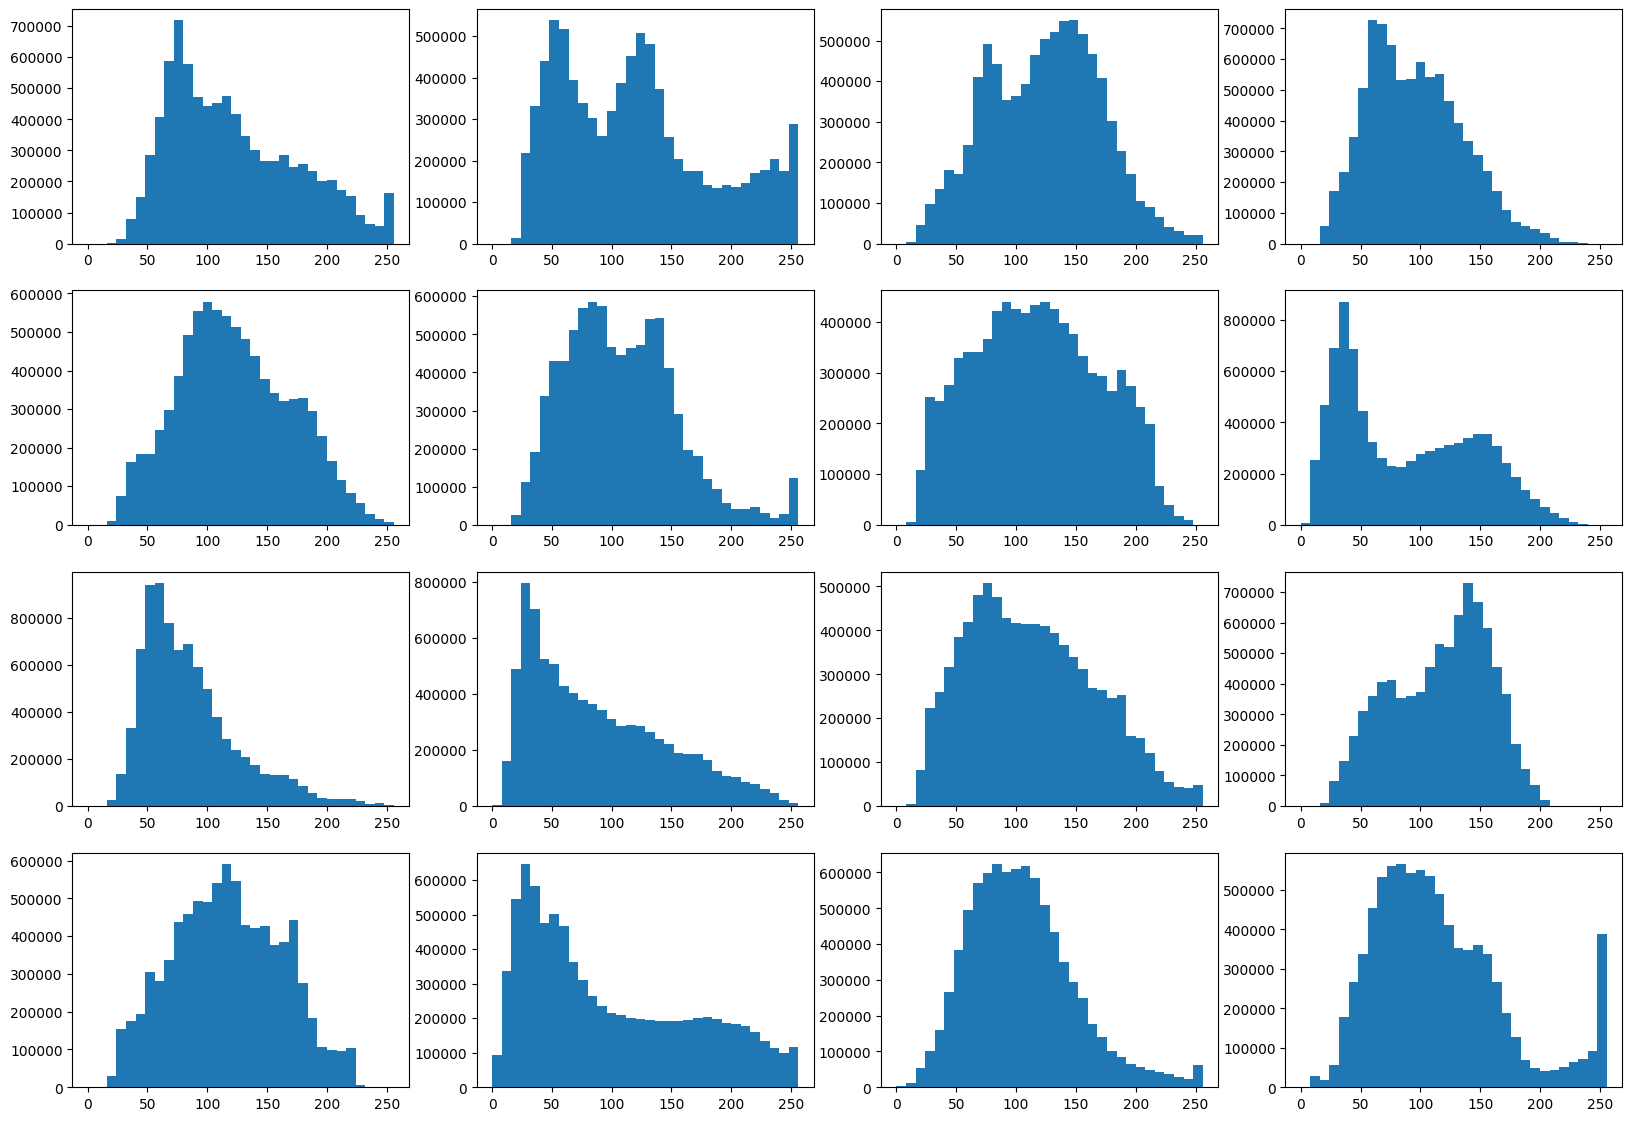

In [19]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'/content/drive/MyDrive/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
plt.show()

In [20]:
img.shape

(1365, 2048, 3)

# Making Training Data

## Reading data from Keras Generators

In [21]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

In [22]:
X_train, X_valid = train_test_split(dataset, test_size=0.05, shuffle=False)

## Making a Tensorflow Dataset

In [23]:
BATCH_SIZE = 8

train_generator = datagen.flow_from_dataframe(dataset,
                    directory='/content/drive/MyDrive/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

valid_generator = datagen.flow_from_dataframe(X_valid,
                    directory='/content/drive/MyDrive/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

Found 1821 validated image filenames.
Found 92 validated image filenames.


## Generator Images Visualisations

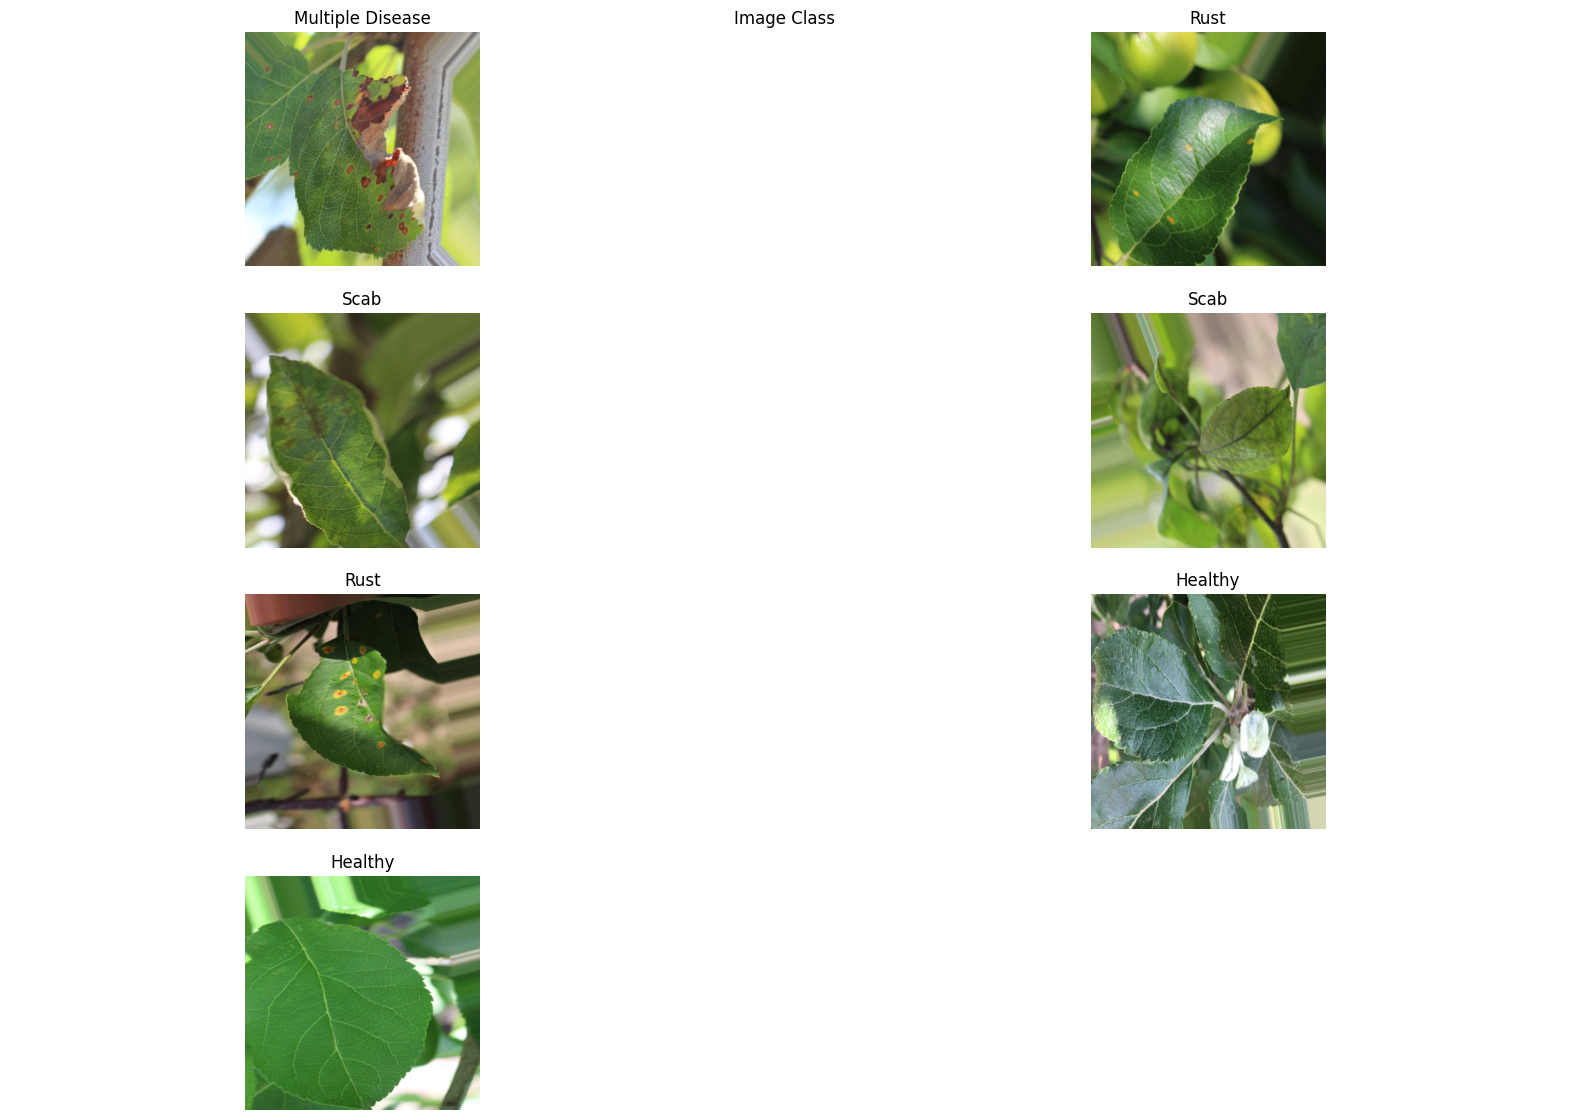

In [26]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 2
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows):

    # Use __next__() instead of next() to get the next batch
    img_batch, label_batch = train_generator.__next__()
    fig.add_subplot(rows, columns, i)

    if label_batch[i][0] == 1:
        plt.title('Healthy')
    elif label_batch[i][1] == 1:
        plt.title('Multiple Disease')
    elif label_batch[i][2] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    plt.imshow(img_batch[i])
    plt.axis('off')
plt.show()

# Making The Models

## Xception Model

In [27]:
xception_model = tf.keras.models.Sequential([
  tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 16, 16, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,869,676 (79.61 MB)

 Trainable params: 20,815,148 (79.40 MB)

 Non-trainable params: 54,528 (213.00 KB)

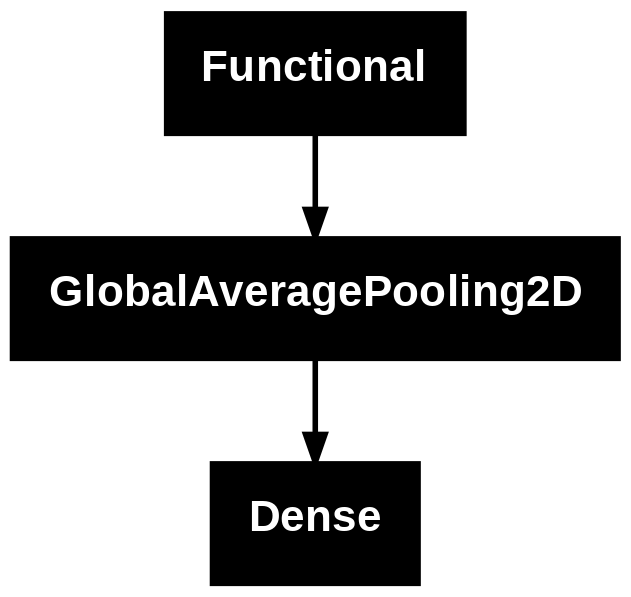

In [28]:
tf.keras.utils.plot_model(xception_model, to_file='xception_model.png')

## DenseNet121

In [29]:
densenet_model = tf.keras.models.Sequential([
    tf.keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet',input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 16, 16, 1024)   │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,041,604 (26.86 MB)

 Trainable params: 6,957,956 (26.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

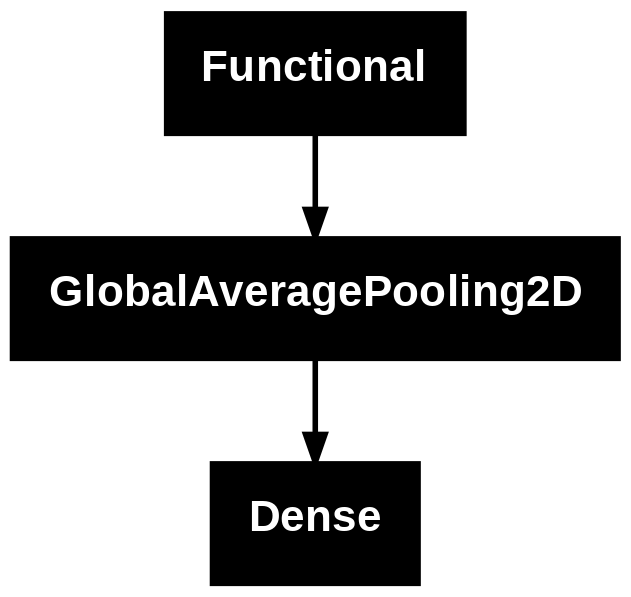

In [30]:
tf.keras.utils.plot_model(densenet_model, to_file='densenet_model.png')

# Ensembling the Models

In [31]:
inputs = tf.keras.Input(shape=(512, 512, 3))

xception_output = xception_model(inputs)
densenet_output = densenet_model(inputs)

outputs = tf.keras.layers.average([densenet_output, xception_output])


model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 4)         │  7,041,604 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 4)         │ 20,869,676 │ input_layer_4[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average (Average)   │ (None, 4)         │          0 │ sequential_1[0][… │
│                     │                   │            │ sequential[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,911,280 (106.47 MB)

 Trainable params: 27,773,104 (105.95 MB)

 Non-trainable params: 138,176 (539.75 KB)

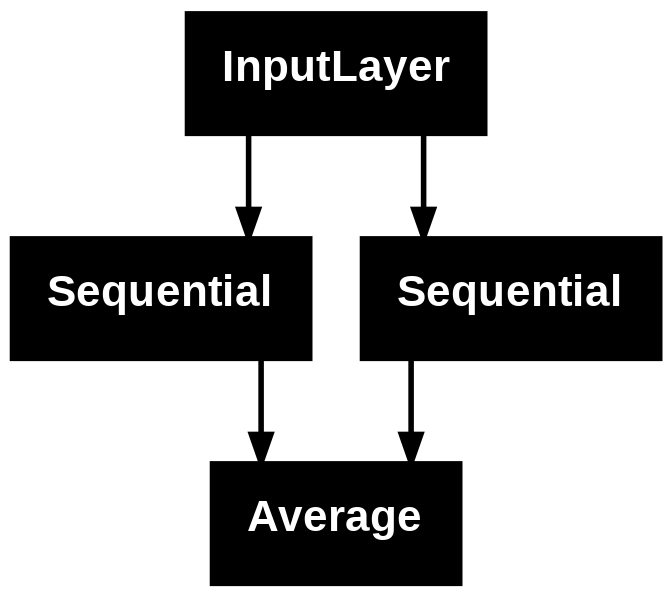

In [32]:
tf.keras.utils.plot_model(model, to_file='model.png')

## Setting the hyperparameters & Callbacks

Learning rate schedule: 1e-05 to 0.0001 to 8.2e-05


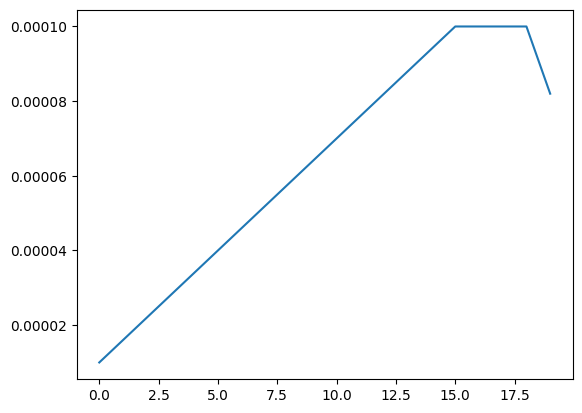

In [33]:
LR_START = 0.00001
LR_MAX = 0.0001
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 15
LR_SUSTAIN_EPOCHS = 3
LR_EXP_DECAY = .8
EPOCHS = 20

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [34]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=2, save_best_only=True)

# Tensordash is used for getting live model training status, like accuracy or loss, in your phone, sure to checkout here: https://github.com/CleanPegasus/TensorDash
#histories = Tensordash(
   # email = secret_value_0,
   # password = secret_value_1,
   # ModelName = "Plant Disease Model")

# Training the Model

In [36]:
# Model training
# Use fit instead of fit_generator
model_history = model.fit(train_generator, epochs=EPOCHS, validation_data=valid_generator, callbacks=[model_checkpoint,lr_callback])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5957 - loss: 1.1056
Epoch 1: val_accuracy improved from -inf to 0.86957, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 1899s 7s/step - accuracy: 0.5961 - loss: 1.1049 - val_accuracy: 0.8696 - val_loss: 0.6198 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.6000000000000003e-05.
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.8511 - loss: 0.5512
Epoch 2: val_accuracy improved from 0.86957 to 0.92391, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.8511 - loss: 0.5509 - val_accuracy: 0.9239 - val_loss: 0.2387 - learning_rate: 1.6000e-05

Epoch 3: LearningRateScheduler setting learning rate to 2.2e-05.
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.9124 - loss: 0.2950
Epoch 3: val_accuracy improved from 0.92391 to 0.94565, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9123 - loss: 0.2950 - val_accuracy: 0.9457 - val_loss: 0.1476 - learning_rate: 2.2000e-05

Epoch 4: LearningRateScheduler setting learning rate to 2.8000000000000003e-05.
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.9155 - loss: 0.2425
Epoch 4: val_accuracy improved from 0.94565 to 0.95652, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.9156 - loss: 0.2424 - val_accuracy: 0.9565 - val_loss: 0.1122 - learning_rate: 2.8000e-05

Epoch 5: LearningRateScheduler setting learning rate to 3.4e-05.
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.9403 - loss: 0.1673
Epoch 5: val_accuracy did not improve from 0.95652
228/228 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9403 - loss: 0.1673 - val_accuracy: 0.9565 - val_loss: 0.1102 - learning_rate: 3.4000e-05

Epoch 6: LearningRateScheduler setting learning rate to 4e-05.
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.9514 - loss: 0.1423
Epoch 6: val_accuracy improved from 0.95652 to 0.97826, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9515 - loss: 0.1423 - val_accuracy: 0.9783 - val_loss: 0.0710 - learning_rate: 4.0000e-05

Epoch 7: LearningRateScheduler setting learning rate to 4.6e-05.
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.9755 - loss: 0.0966
Epoch 7: val_accuracy did not improve from 0.97826
228/228 ━━━━━━━━━━━━━━━━━━━━ 227s 994ms/step - accuracy: 0.9755 - loss: 0.0967 - val_accuracy: 0.9783 - val_loss: 0.0468 - learning_rate: 4.6000e-05

Epoch 8: LearningRateScheduler setting learning rate to 5.2000000000000004e-05.
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.9747 - loss: 0.0874
Epoch 8: val_accuracy improved from 0.97826 to 0.98913, saving model to model.h5


228/228 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.9747 - loss: 0.0874 - val_accuracy: 0.9891 - val_loss: 0.0791 - learning_rate: 5.2000e-05

Epoch 9: LearningRateScheduler setting learning rate to 5.8e-05.
Epoch 9/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 954ms/step - accuracy: 0.9755 - loss: 0.0764
Epoch 9: val_accuracy did not improve from 0.98913
228/228 ━━━━━━━━━━━━━━━━━━━━ 259s 991ms/step - accuracy: 0.9755 - loss: 0.0764 - val_accuracy: 0.9891 - val_loss: 0.0790 - learning_rate: 5.8000e-05

Epoch 10: LearningRateScheduler setting learning rate to 6.4e-05.
Epoch 10/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.9750 - loss: 0.0704
Epoch 10: val_accuracy did not improve from 0.98913
228/228 ━━━━━━━━━━━━━━━━━━━━ 224s 979ms/step - accuracy: 0.9750 - loss: 0.0704 - val_accuracy: 0.9891 - val_loss: 0.0839 - learning_rate: 6.4000e-05

Epoch 11: LearningRateScheduler setting learning rate to 7.000000000000001e-05.
Epoch 11/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accur

### Saving History

In [37]:
# Saving model history
pd.DataFrame(model_history.history).to_csv('ModelHistory.csv')

### Model History Visualisation

Text(0.5, 1.0, 'accuracy Plot')

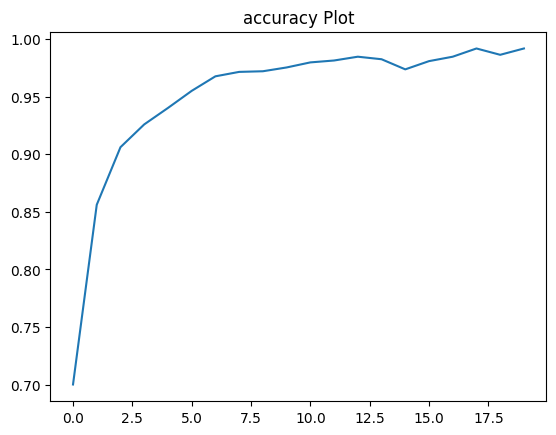

In [38]:
plt.plot(pd.DataFrame(model_history.history)['accuracy'])
plt.title("accuracy Plot")

Text(0.5, 1.0, 'Loss Plot')

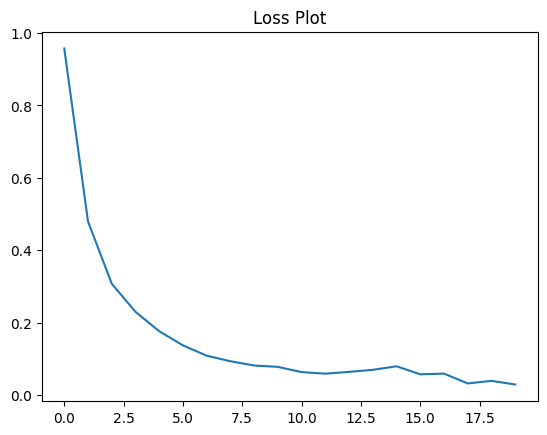

In [39]:
plt.plot(pd.DataFrame(model_history.history)['loss'])
plt.title("Loss Plot")

Text(0.5, 1.0, 'Validation Accuracy Plot')

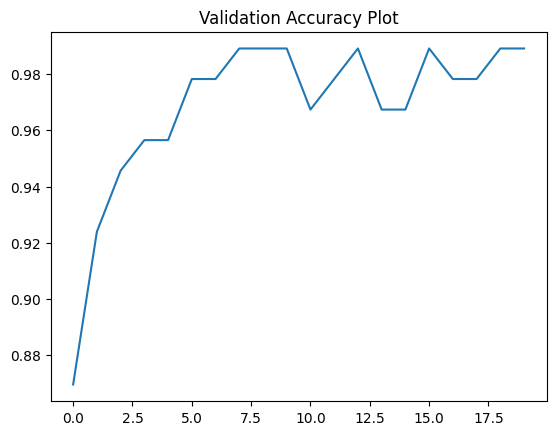

In [40]:
plt.plot(pd.DataFrame(model_history.history)['val_accuracy'])
plt.title("Validation Accuracy Plot")

Text(0.5, 1.0, 'Validation Loss Plot')

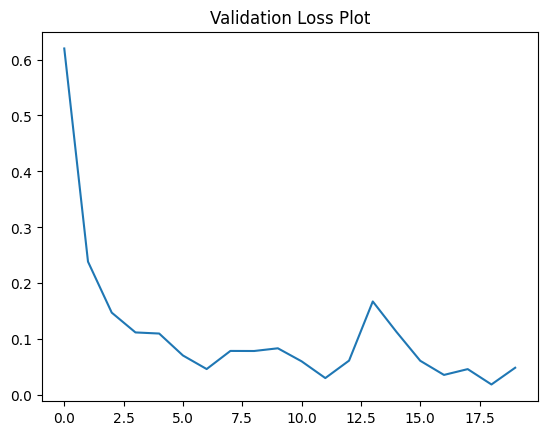

In [41]:
plt.plot(pd.DataFrame(model_history.history)['val_loss'])
plt.title("Validation Loss Plot")

# Predicting Classes

In [42]:
# Reading testing and submission data
test_dataset = pd.read_csv('/content/drive/MyDrive/plant/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/plant/sample_submission.csv')
test_dataset

image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]

In [43]:
# Adding .jpg extension to image_id
test_dataset['image_id'] = test_dataset['image_id']+'.jpg'

In [44]:
test_gen = datagen.flow_from_dataframe(test_dataset,
                    directory='/content/drive/MyDrive/plant/images/',
                    x_col='image_id',
                    target_size=(512, 512),
                    class_mode=None,
                    shuffle=False,
                    batch_size=8)

Found 1821 validated image filenames.


In [46]:
# Predicting class
predictions = model.predict(test_gen) # Use predict instead of predict_generator

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


228/228 ━━━━━━━━━━━━━━━━━━━━ 1474s 6s/step


In [47]:
submission['healthy'] = predictions[:, 0]
submission['multiple_diseases'] = predictions[:, 1]
submission['rust'] = predictions[:, 2]
submission['scab'] = predictions[:, 3]

In [48]:
submission

image_id       healthy  multiple_diseases          rust          scab
0        Test_0  1.698959e-05       2.139456e-04  9.997676e-01  1.477950e-06
1        Test_1  1.256197e-04       1.268004e-02  9.871709e-01  2.340312e-05
2        Test_2  1.945124e-07       8.338030e-10  1.522372e-08  9.999998e-01
3        Test_3  9.941700e-01       1.433219e-06  5.601913e-03  2.267198e-04
4        Test_4  7.749126e-06       2.808466e-03  9.971728e-01  1.086920e-05
...         ...           ...                ...           ...           ...
1816  Test_1816  3.009701e-05       6.452831e-03  9.934624e-01  5.460445e-05
1817  Test_1817  1.609021e-04       2.358040e-01  3.115930e-05  7.640039e-01
1818  Test_1818  5.612960e-06       6.231513e-05  9.999318e-01  2.618044e-07
1819  Test_1819  9.989892e-01       5.859121e-07  3.797500e-05  9.721907e-04
1820  Test_1820  4.144786e-06       9.183364e-02  4.312685e-07  9.081618e-01

[1821 rows x 5 columns]

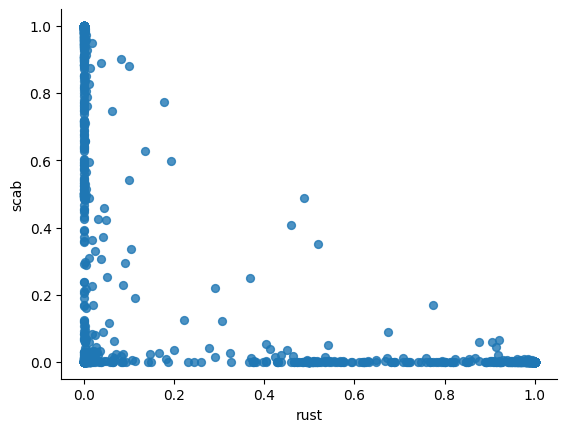

In [49]:
# @title rust vs scab

from matplotlib import pyplot as plt
submission.plot(kind='scatter', x='rust', y='scab', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

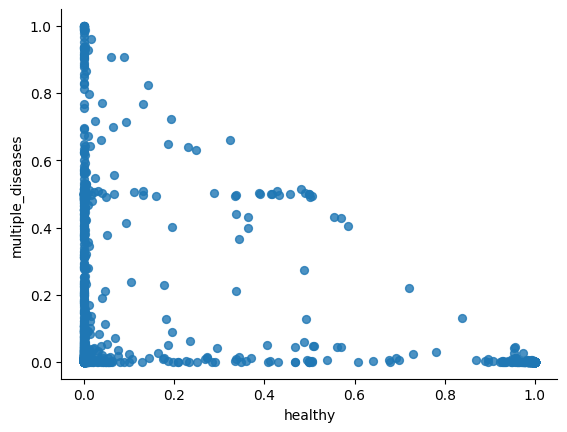

In [50]:
# @title healthy vs multiple_diseases

from matplotlib import pyplot as plt
submission.plot(kind='scatter', x='healthy', y='multiple_diseases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

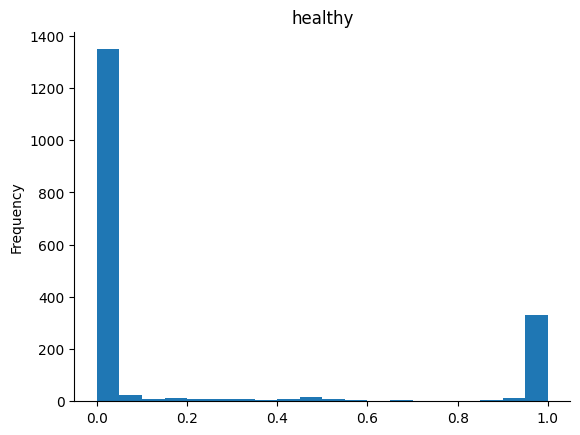

In [51]:
# @title healthy

from matplotlib import pyplot as plt
submission['healthy'].plot(kind='hist', bins=20, title='healthy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [52]:
submission.to_csv('submission.csv', index=False)